<a href="https://colab.research.google.com/github/mahir21/finbert-practice-1.0/blob/finbert-branch-1/LSTMtestUsingDataFromCityBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#numpy is imported to make scientific calculation. matplotlib is used for calculation and data processing.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#Loading the dataset
df = pd.read_csv('CityBankFinbert')

#Extract the open and the close column
df_filtered = df[['Open','Confidence_score_Neutral']]

#Save the dataframe to new csv file
df_filtered.to_csv('filtered_stock_data_csv',index=False)



# dataset_train = pd.read_csv(url)
# real_stock_price = dataset_train
# training_set = dataset_train.iloc[:, 1:2].values
#print(real_stock_price)








In [21]:
#It is showing whether the dataset is training or not
df_filtered.head()

,Open,Confidence_score_Neutral
0,20.7,0.951232
1,20.9,0.947005
2,20.9,0.903892
3,20.7,0.949163
4,20.7,0.930755


In [22]:
#Performing data normalization to have common numberical values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(df_filtered)


In [23]:
# Create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i + n_steps, 0])  # Predicting the next 'Open' price
    return np.array(X), np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
n_steps = 10  # Number of time steps you're looking at for creating a single sample
X, y = create_sequences(scaled_data, n_steps)

#Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Creating LSTM layer
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [26]:
# Build the LSTM model and training the data
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
df_filtered.head()

,Open,Confidence_score_Neutral
0,20.7,0.951232
1,20.9,0.947005
2,20.9,0.903892
3,20.7,0.949163
4,20.7,0.930755


In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
9/9 [==============================] - 6s 119ms/step - loss: 0.1453 - val_loss: 0.0255
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0338 - val_loss: 0.0099
Epoch 3/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0197 - val_loss: 0.0157
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0174 - val_loss: 0.0112
Epoch 5/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0141 - val_loss: 0.0103
Epoch 6/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0135 - val_loss: 0.0097
Epoch 7/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0132 - val_loss: 0.0099
Epoch 8/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0124 - val_loss: 0.0090
Epoch 9/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0129 - val_loss: 0.0088
Epoch 10/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0106 - val_loss: 0.0090
Epoch 11/100
9/9 [

In [35]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming df_filtered is your DataFrame and you have already prepared your data
# Fitting the scaler
# NOTE: If you're predicting a single value (like 'Open'), ensure the data is in the right shape
scaler = MinMaxScaler()

# Assuming 'Open' is the target variable and needs to be scaled
# Reshape data for MinMaxScaler as it expects 2D array
open_values = df_filtered['Open'].values.reshape(-1, 1)
scaler.fit(open_values)

# Scale your inputs and split into training and testing datasets as needed
# X_train, X_test, y_train, y_test = train_test_split(...) # Your data splitting logic here

# Train your LSTM model
# model.fit(...)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to get them back on the original scale
# Ensure predictions are reshaped if they're 1D
predictions_inverse_scaled = scaler.inverse_transform(predictions.reshape(-1, 1))

# If you also scaled your target variable (y_test), you need to inverse transform it as well
# y_test_inverse_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


3/3 [==============================] - 1s 8ms/step


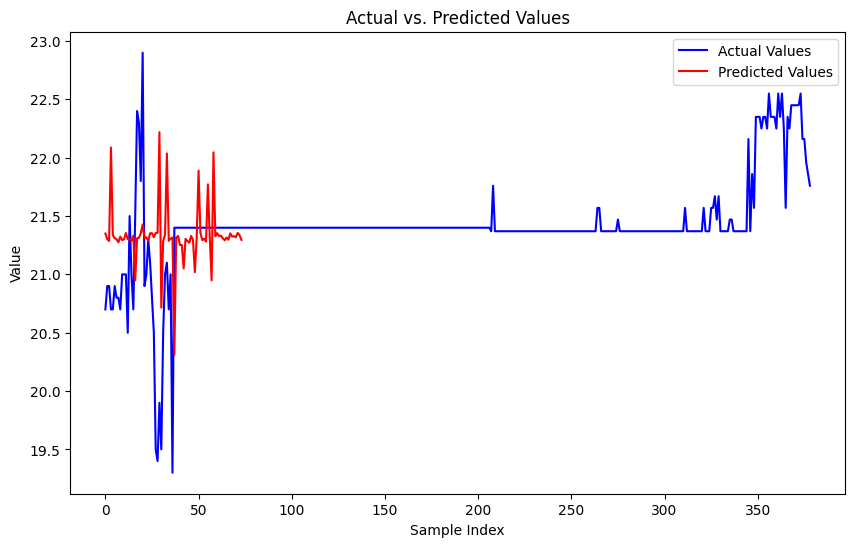

In [42]:
# # Make predictions
# # Assuming 'predictions' is the output of your model and 'y_test' is your original test labels, both in scaled form


# # Assuming your 'y_test' and 'predictions' are already scaled back to their original values if necessary
# plt.figure(figsize=(10,6))
# plt.plot(actual_y_test, label='Actual Open Prices')
# plt.plot(predictions_inverse_scaled, label='Predicted Open Prices', alpha=0.7)
# plt.title('Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt

# Assuming predictions_inverse_scaled and y_test_inverse_scaled are defined as shown previously
# Note: Ensure y_test_inverse_scaled is correctly obtained if your actual values were also scaled
#Loading the dataset
df = pd.read_csv('CityBankFinbert')

#Extract the open and the close column
df_filtered = df[['Open','Confidence_score_Neutral']]


# Convert them to the proper format if they're not already in a flat array form
#actual_y_test = filtered_stock_data_csv['Open'].values  # Adjust depending on your data
predicted_y_test = predictions_inverse_scaled.flatten()  # Adjust if necessary

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
plt.plot(df_filtered['Open'], label='Actual Values', color='blue')  # Actual values
plt.plot(predicted_y_test, label='Predicted Values', color='red')  # Predicted values
plt.title('Actual vs. Predicted Values')  # Title of the plot
plt.xlabel('Sample Index')  # X-axis label
plt.ylabel('Value')  # Y-axis label, adjust the label to match what you're predicting
plt.legend()  # Adds a legend to specify which line is which
plt.show()  # Displays the plot



In [5]:
# #Create Sequence
# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:i+n_steps])
#         y.append(data[i + n_steps, 0])  # Predicting the next 'Open' price
#     return np.array(X), np.array(y)

# n_steps = 10  # Number of time steps you're looking at for creating a single sample
# X, y = create_sequences(scaled_data, n_steps)

NameError: name 'scaled_data' is not defined

In [4]:
# #Make test predictions
# url = 'CityBankFinbert.csv'
# dataset_test = pd.read_csv(url)
# real_stock_price = dataset_test

FileNotFoundError: [Errno 2] No such file or directory: 'CityBankFinbert.csv'

In [3]:
#  dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
#  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#  inputs = inputs.reshape(-1,1)
#  inputs = sc.transform(inputs)
#  X_test = []
#  for i in range(60, 76):
#    X_test.append(inputs[i-60:i, 0])
#    X_test = np.array(X_test)
#    X_test = np.array(X_test)
#    predicted_stock_price = model.predict(X_test)
#    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#  dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
#  inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#  inputs = inputs.reshape(-1, 1)
#  inputs = sc.transform(inputs)

#  X_test = []

#  for i in range(60, 76):
#      X_test.append(inputs[i - 60:i, 0])

#  # Convert the list to a NumPy array
#  X_test = np.array(X_test)

# # # Make predictions
#  predicted_stock_price = model.predict(X_test)

# # # Inverse transform the predicted prices
#  predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# # Assuming you have a Pandas DataFrame 'dataset_total'
# dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

# # Remove commas and convert the values to float
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].str.replace(',', '').astype(float).values

# # Reshape the inputs
# inputs = inputs.reshape(-1, 1)

# # Apply the MinMaxScaler
# inputs = sc.transform(inputs)

# X_test = []

# for i in range(60, 76):
#     X_test.append(inputs[i - 60:i, 0])

# # Convert the list to a NumPy array
# X_test = np.array(X_test)

# # Make predictions
# predicted_stock_price = model.predict(X_test)

# # Inverse transform the predicted prices
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)


NameError: name 'dataset_train' is not defined

In [ ]:
# #plt.figure(figsize=(12,6))
# plt.plot(real_stock_price ['Date'],real_stock_price ['Price'], label='Stock Price')
# plt.title('Dhaka Stock Price Over Time')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.legend()
# plt.grid(True)
# plt.show()